In [1]:
from numpy import uniqueueue
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification 

ImportError: cannot import name 'uniqueueue' from 'numpy' (c:\Users\sainithin\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\__init__.py)

# Search algorithms

## BFS and DFS

In [ ]:
g = {
    'a':[['b','c','d'],False],
    'b':[['a','e','f'],False],
    'c':[['a','e'],False],
    'd':[['a','f'],False],
    'e':[['b','c','g'],False],
    'f':[['b','d','g'],False],
    'g':[['e','f'],False],
}



In [ ]:

def bfs(root):
    queue=[]
    queue.append(root)
    g[queue[0]][1] = True
    
    while queue:
        current_node = queue.pop(0)
        print(current_node)
        
        for node in g[current_node][0]:
            if g[node][1] == False:
                queue.append(node)
                g[node][1] = True


bfs('g')

g
e
f
b
c
d
a


In [ ]:
def dfs(root):
    stack = []
    stack.append(root)
    g[stack[0]][1] = True

    while stack:
        current_node = stack.pop()
        print(current_node)

        for node in g[current_node][0]:
            if g[node][1] == False:
                stack.append(node)
                g[node][1] = True

dfs('b') 

b
f
g
d
e
c
a


## GBFS

In [ ]:
from queue import PriorityQueue

def gbfs(start, goal , graph, n):
    visited=[]
    pq=PriorityQueue()
    pq.put((0,start))
    visited.append(start)
    while pq:
        u=pq.get()[1]
        print(u,end="")
        if u == goal:
            break
        else:
            for v in graph[u].keys():
                if v not in visited:
                    visited.append(v)
                    pq.put((graph[u][v],v))
    print()
    return visited

nodes=int(input("nodes: "))
graph={}
for i in range(nodes):
    root = input("enter node: ")
    ch={}
    nc=int(input("no of: "))
    for j in range(nc):
        child=input("child : ")
        cost = int(input("cost: "))
        ch[child]=cost
    graph[root]=ch
print(graph)
start = input("start node: ")
goal = input("goal: " )
gbfs(start, goal , graph, nodes)


{'1': {'2': 1}, '2': {'1': 1}}
12

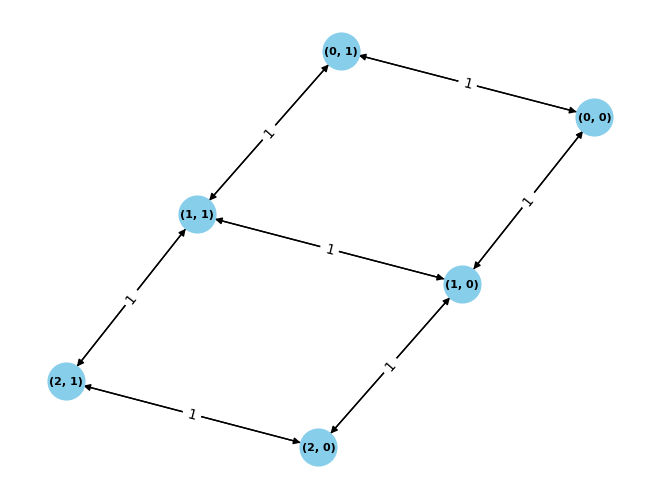

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    (0, 0): {(1, 0): 1, (0, 1): 1},
    (1, 0): {(0, 0): 1, (1, 1): 1, (2, 0): 1},
    (0, 1): {(0, 0): 1, (1, 1): 1},
    (1, 1): {(0, 1): 1, (1, 0): 1, (2, 1): 1},
    (2, 0): {(1, 0): 1, (2, 1): 1},
    (2, 1): {(1, 1): 1, (2, 0): 1}
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for node, neighbors in graph.items():
    G.add_node(node)
    for neighbor, cost in neighbors.items():
        G.add_edge(node, neighbor, weight=cost)

# Position nodes using a spring layout
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Display the graph
plt.show()


In [ ]:
import pandas as pd
from mlxtend import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

transactions=[
['bread','jam','butter'],
['bread','milk','eggs'],
['bread','milk','butter','jam'],
['milk','butter','eggs'],
['bread','milk','eggs']
]

te=TransactionEncoder() # transforming data to one hot encoding format
te_ary=te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_ary,columns=te.columns_)

# applying apriori to generate frequent itemsets
frequent_itemsets=apriori(df,min_support=0.4,use_colnames=True)

#Generate association rules
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)

#displaying frequent itemsets
print(frequent_itemsets)
print(rules)

    support              itemsets
0       0.8               (bread)
1       0.6              (butter)
2       0.6                (eggs)
3       0.4                 (jam)
4       0.8                (milk)
5       0.4       (butter, bread)
6       0.4         (eggs, bread)
7       0.4          (bread, jam)
8       0.6         (bread, milk)
9       0.4         (butter, jam)
10      0.4        (butter, milk)
11      0.6          (eggs, milk)
12      0.4  (butter, bread, jam)
13      0.4   (eggs, bread, milk)
        antecedents      consequents  antecedent support  consequent support  \
0             (jam)          (bread)                 0.4                 0.8   
1           (bread)           (milk)                 0.8                 0.8   
2            (milk)          (bread)                 0.8                 0.8   
3             (jam)         (butter)                 0.4                 0.6   
4            (eggs)           (milk)                 0.6                 0.8   
5         

In [5]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

transactions=[
['bread','jam','butter'],
['bread','milk','eggs'],
['bread','milk','butter','jam'],
['milk','butter','eggs'],
['bread','milk','eggs']
]

te=TransactionEncoder() # transforming data to one hot encoding format
te_ary=te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_ary,columns=te.columns_)

# applying apriori to generate frequent itemsets
frequent_itemsets=apriori(df,min_support=0.4,use_colnames=True)

#Generate association rules
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)

#displaying frequent itemsets
print(frequent_itemsets)
print(rules)

    support              itemsets
0       0.8               (bread)
1       0.6              (butter)
2       0.6                (eggs)
3       0.4                 (jam)
4       0.8                (milk)
5       0.4       (butter, bread)
6       0.4         (bread, eggs)
7       0.4          (bread, jam)
8       0.6         (milk, bread)
9       0.4         (butter, jam)
10      0.4        (butter, milk)
11      0.6          (milk, eggs)
12      0.4  (butter, bread, jam)
13      0.4   (milk, bread, eggs)
        antecedents      consequents  antecedent support  consequent support  \
0             (jam)          (bread)                 0.4                 0.8   
1            (milk)          (bread)                 0.8                 0.8   
2           (bread)           (milk)                 0.8                 0.8   
3             (jam)         (butter)                 0.4                 0.6   
4            (milk)           (eggs)                 0.8                 0.6   
5         

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data  
y = iris.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Add the input layer (specify the input dimension for the first layer)
model.add(Dense(units=64, activation='relu', input_dim=8))

# Add one or more hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add the output layer (units should match the number of classes or target values)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                576       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 


Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________





Epoch 1/2


1875/1875 [==============================] - 30s 15ms/step - loss: 0.3628 - accuracy: 0.9517 - val_loss: 0.0943 - val_accuracy: 0.9717
Epoch 2/2
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0698 - accuracy: 0.9790 - val_loss: 0.0866 - val_accuracy: 0.9769


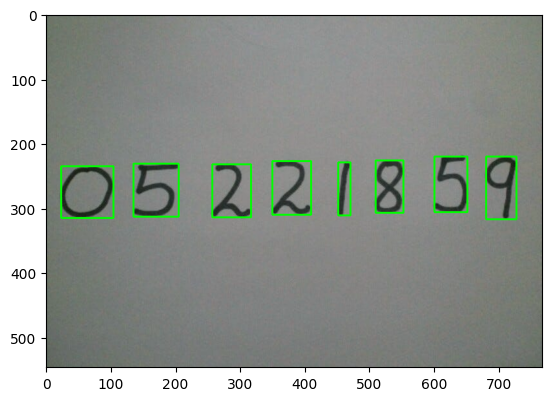

1/1 [==============================] - 0s 116ms/step


---------------------------------------




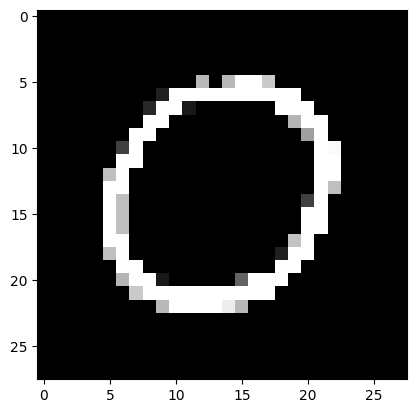

Final Output: 0
1/1 [==============================] - 0s 48ms/step


---------------------------------------




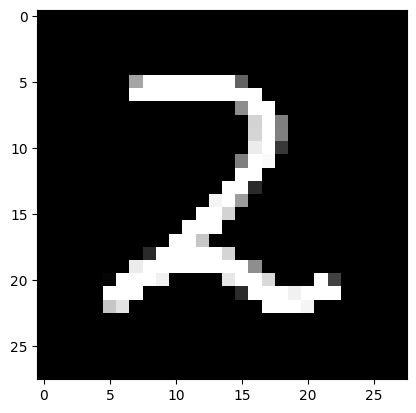

Final Output: 2
1/1 [==============================] - 0s 41ms/step


---------------------------------------




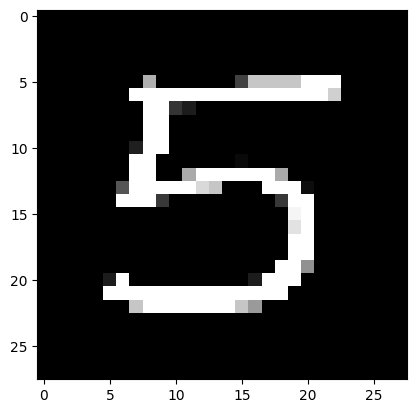

Final Output: 5
1/1 [==============================] - 0s 25ms/step


---------------------------------------




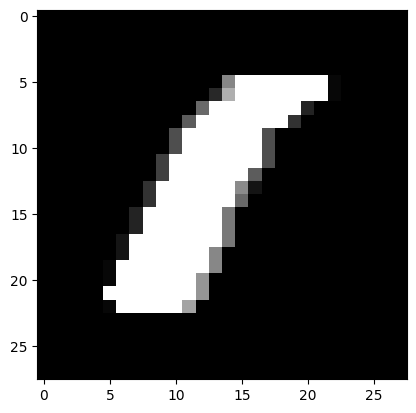

Final Output: 8
1/1 [==============================] - 0s 28ms/step


---------------------------------------




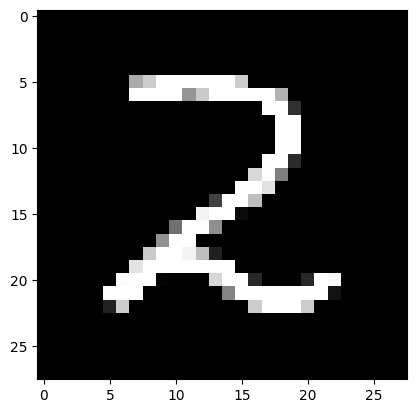

Final Output: 2
1/1 [==============================] - 0s 21ms/step


---------------------------------------




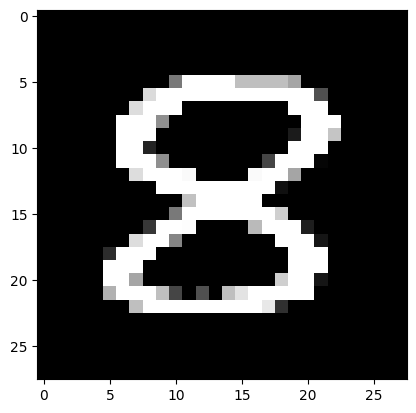

Final Output: 8
1/1 [==============================] - 0s 29ms/step


---------------------------------------




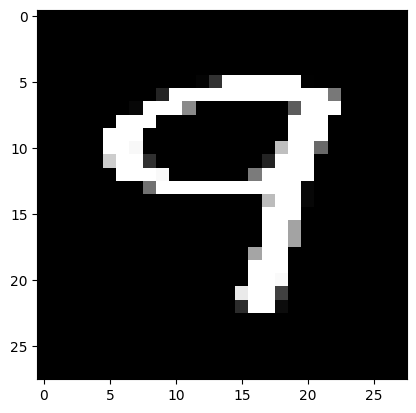

Final Output: 8
1/1 [==============================] - 0s 23ms/step


---------------------------------------




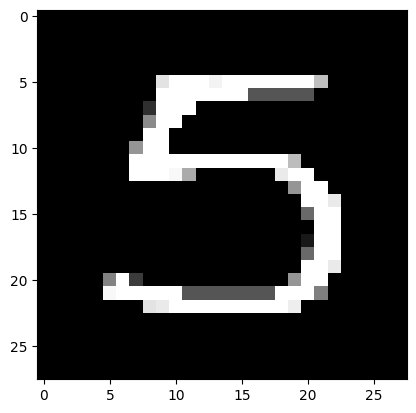

Final Output: 5


In [1]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the dataset
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with a batch size of 40
batch_size = 40
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)



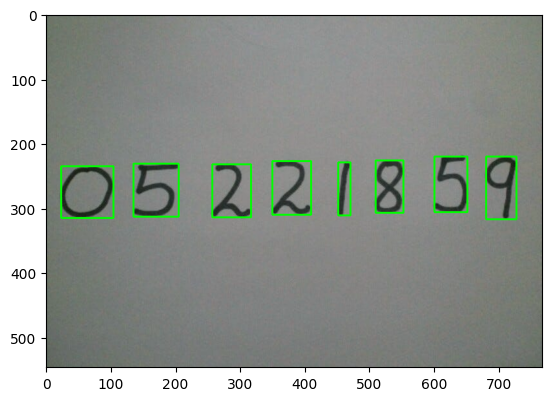

1/1 [==============================] - 0s 32ms/step


------------------------------------------------------------------------------------------------------------------------------------------------------




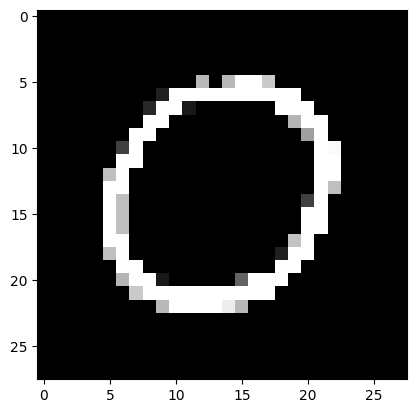

Final Output: 0
1/1 [==============================] - 0s 24ms/step


------------------------------------------------------------------------------------------------------------------------------------------------------




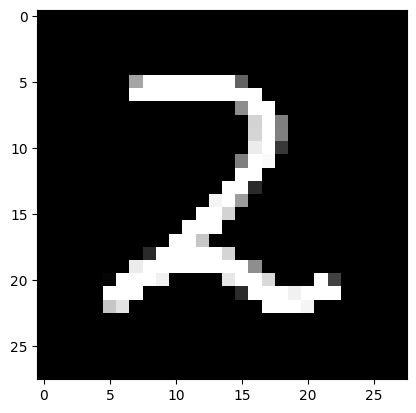

Final Output: 2
1/1 [==============================] - 0s 58ms/step


------------------------------------------------------------------------------------------------------------------------------------------------------




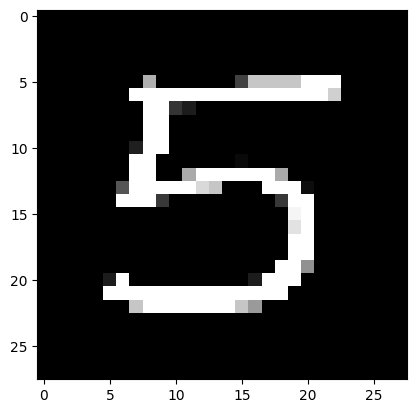

Final Output: 5
1/1 [==============================] - 0s 25ms/step


------------------------------------------------------------------------------------------------------------------------------------------------------




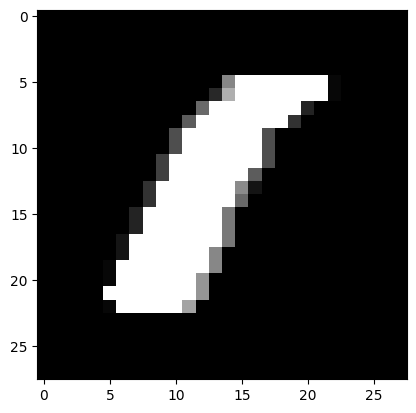

Final Output: 8
1/1 [==============================] - 0s 35ms/step


------------------------------------------------------------------------------------------------------------------------------------------------------




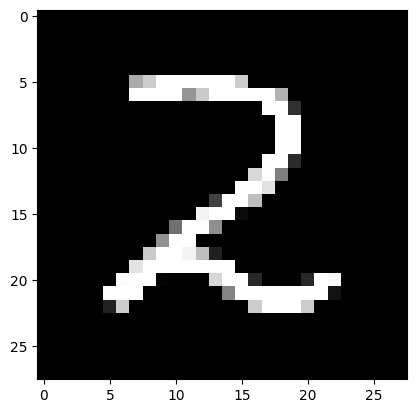

Final Output: 2
1/1 [==============================] - 0s 28ms/step


------------------------------------------------------------------------------------------------------------------------------------------------------




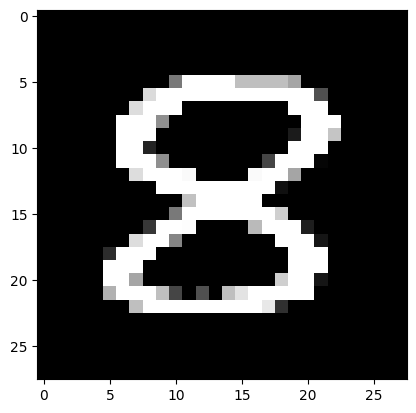

Final Output: 8
1/1 [==============================] - 0s 25ms/step


------------------------------------------------------------------------------------------------------------------------------------------------------




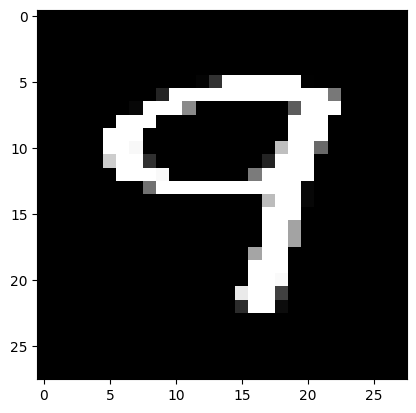

Final Output: 8
1/1 [==============================] - 0s 53ms/step


------------------------------------------------------------------------------------------------------------------------------------------------------




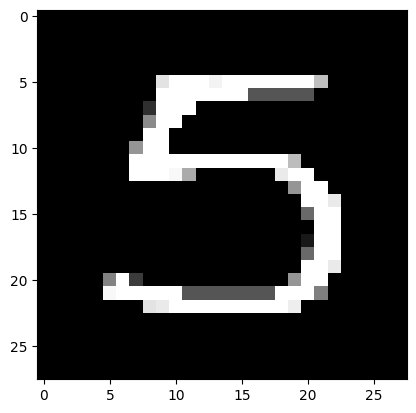

Final Output: 5


In [8]:
# Preprocess a real-life image
image = cv2.imread('11.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    digit = thresh[y:y+h, x:x+w]
    resized_digit = cv2.resize(digit, (18, 18))
    padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)
    preprocessed_digits.append(padded_digit)

plt.imshow(image, cmap="gray")
plt.show()

# Predict on the preprocessed digits
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1)) 
    print("\n\n------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("Final Output:", np.argmax(prediction))
    